In [1]:
import xarray as xr
import pandas as pd

ds_sat= xr.open_dataset('LGMR_data/ds_sat_flipped.nc')
df_pre= pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\pre.csv")
df_obl= pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\obl.csv")
ds_sat_ens= xr.open_dataset('LGMR_data/ds_sat_ens_flipped.nc')

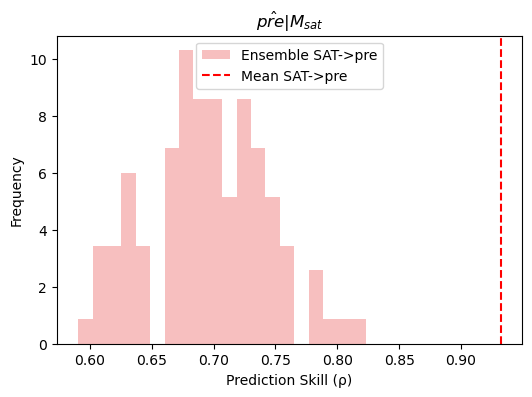

True


In [5]:
import numpy as np
import xarray as xr
import pandas as pd
from toolbox import significant_test as st
import importlib
importlib.reload(st)



results = st.ccm_significance_statistic(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    lat_idx=40,
    lon_idx=10,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=0,
    libSizes="10 20 30 40 50 60 70",
    show_figures=False,
)

ccm_out = results["ccm_mean"]
ensemble_ccm = results["ensemble_ccm"]

test_result = st.ccm_significance_test(ccm_out, ensemble_ccm, uni_dir=True, if_plot=True)
print(test_result)


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import random
from toolbox import significant_test as st
import importlib
importlib.reload(st)

def test_cp_cutoff(ds_sat, df_pre, ds_sat_ens, 
                                     N=100, ens_sample=100, 
                                     E_val=4, tau_val=3, Tp_val=0, 
                                     libSizes="10 20 30 40 50 60 70", 
                                     uni_dir=True, if_plot=False):
    """
    Randomly selects N grid points from ds_sat and runs the CCM significance test 
    for each using the provided parameters.
    
    Parameters:
        ds_sat      : xarray.Dataset
                      Dataset containing mean SAT data. Must include dimensions "lat", "lon", and "age".
        df_pre      : pandas.DataFrame
                      DataFrame containing pre data (with column "pre" and matching age series).
        ds_sat_ens  : xarray.Dataset
                      Dataset with ensemble SAT data.
        N           : int, default 100
                      Number of random grid points (lat, lon pairs) to test.
        ens_sample  : int, default 100
                      Number of ensemble members to use in CCM significance statistic.
        E_val       : int, default 4
                      Embedding dimension for CCM.
        tau_val     : int, default 3
                      Time delay for CCM.
        Tp_val      : int, default 0
                      Prediction horizon for CCM.
        libSizes    : str, default "10 20 30 40 50 60 70"
                      Library sizes string for CCM.
        uni_dir     : bool, default True
                      Flag passed to the significance test (e.g., testing unidirectional coupling).
        show_figures: bool, default False
                      If True, intermediate figures are displayed.
                      
    Returns:
        significant_fraction : float
            The fraction of grid points that yielded a significant CCM test.
        test_results         : list of bool
            A list of Boolean test results for each grid point.
    """
    # Get grid dimensions
    nlat = ds_sat.sizes["lat"]
    nlon = ds_sat.sizes["lon"]
    
    # Build a list of all possible (lat, lon) pairs and randomly select N of them
    all_pairs = [(i, j) for i in range(nlat) for j in range(nlon)]
    selected_pairs = random.sample(all_pairs, N)
    
    # Loop over the selected grid points and run significance tests
    test_results = []
    for idx, (i, j) in enumerate(selected_pairs):
        remaining = N - idx
        print(f"Processing grid point: lat_idx={i}, lon_idx={j}, {remaining} remaining, total {N}")
        
        results = st.ccm_significance_statistic(
            ds_sat= ds_sat,
            df_pre= df_pre,
            ds_sat_ens= ds_sat_ens,
            lat_idx=i,
            lon_idx=j,
            ens_sample=ens_sample,
            E_val=E_val,
            tau_val=tau_val,
            Tp_val=Tp_val,
            libSizes=libSizes,
            show_figures=False,
        )
        ccm_out = results["ccm_mean"]
        ensemble_ccm = results["ensemble_ccm"]
        test_result = st.ccm_significance_test(ccm_out, ensemble_ccm, uni_dir=uni_dir, if_plot=False)
        test_results.append(test_result)
    
    # Calculate the fraction of grid points with significant results
    significant_fraction = np.mean(test_results)
    print(f"Out of {N} random grid points, {sum(test_results)} are significant.")
    print(f"Significance fraction: {significant_fraction:.2f}")
    
    return significant_fraction, test_results



In [14]:

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=-8,
    libSizes="10 20 30 40 50 60 70",
    uni_dir=False,
    if_plot=False,
)

Processing grid point: lat_idx=7, lon_idx=125, 100 remaining, total 100
Processing grid point: lat_idx=51, lon_idx=107, 99 remaining, total 100
Processing grid point: lat_idx=67, lon_idx=127, 98 remaining, total 100
Processing grid point: lat_idx=43, lon_idx=95, 97 remaining, total 100
Processing grid point: lat_idx=49, lon_idx=93, 96 remaining, total 100
Processing grid point: lat_idx=20, lon_idx=134, 95 remaining, total 100
Processing grid point: lat_idx=51, lon_idx=70, 94 remaining, total 100
Processing grid point: lat_idx=28, lon_idx=26, 93 remaining, total 100
Processing grid point: lat_idx=71, lon_idx=14, 92 remaining, total 100
Processing grid point: lat_idx=48, lon_idx=0, 91 remaining, total 100
Processing grid point: lat_idx=46, lon_idx=0, 90 remaining, total 100
Processing grid point: lat_idx=76, lon_idx=139, 89 remaining, total 100
Processing grid point: lat_idx=28, lon_idx=97, 88 remaining, total 100
Processing grid point: lat_idx=58, lon_idx=47, 87 remaining, total 100
Pro

In [13]:

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=-10,
    libSizes="10 20 30 40 50 60 70",
    uni_dir=False,
    if_plot=False,
)


Processing grid point: lat_idx=89, lon_idx=40, 100 remaining, total 100
Processing grid point: lat_idx=15, lon_idx=62, 99 remaining, total 100
Processing grid point: lat_idx=65, lon_idx=35, 98 remaining, total 100
Processing grid point: lat_idx=51, lon_idx=38, 97 remaining, total 100
Processing grid point: lat_idx=22, lon_idx=45, 96 remaining, total 100
Processing grid point: lat_idx=33, lon_idx=11, 95 remaining, total 100
Processing grid point: lat_idx=17, lon_idx=123, 94 remaining, total 100
Processing grid point: lat_idx=67, lon_idx=38, 93 remaining, total 100
Processing grid point: lat_idx=30, lon_idx=98, 92 remaining, total 100
Processing grid point: lat_idx=67, lon_idx=77, 91 remaining, total 100
Processing grid point: lat_idx=0, lon_idx=18, 90 remaining, total 100
Processing grid point: lat_idx=22, lon_idx=7, 89 remaining, total 100
Processing grid point: lat_idx=67, lon_idx=84, 88 remaining, total 100
Processing grid point: lat_idx=16, lon_idx=63, 87 remaining, total 100
Proces

In [12]:

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=-8,
    libSizes="10 20 30 40 50 60 70",
    uni_dir=True,
    if_plot=False,
)

Processing grid point: lat_idx=21, lon_idx=122, 100 remaining, total 100
Processing grid point: lat_idx=20, lon_idx=76, 99 remaining, total 100
Processing grid point: lat_idx=33, lon_idx=117, 98 remaining, total 100
Processing grid point: lat_idx=49, lon_idx=78, 97 remaining, total 100
Processing grid point: lat_idx=94, lon_idx=118, 96 remaining, total 100
Processing grid point: lat_idx=76, lon_idx=7, 95 remaining, total 100
Processing grid point: lat_idx=80, lon_idx=137, 94 remaining, total 100
Processing grid point: lat_idx=65, lon_idx=52, 93 remaining, total 100
Processing grid point: lat_idx=50, lon_idx=26, 92 remaining, total 100
Processing grid point: lat_idx=82, lon_idx=115, 91 remaining, total 100
Processing grid point: lat_idx=89, lon_idx=129, 90 remaining, total 100
Processing grid point: lat_idx=88, lon_idx=75, 89 remaining, total 100
Processing grid point: lat_idx=35, lon_idx=59, 88 remaining, total 100
Processing grid point: lat_idx=80, lon_idx=75, 87 remaining, total 100


In [10]:

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=-10,
    libSizes="10 20 30 40 50 60 70",
    uni_dir=True,
    if_plot=False,
)


Processing grid point: lat_idx=6, lon_idx=98, 100 remaining, total 100
Processing grid point: lat_idx=61, lon_idx=52, 99 remaining, total 100
Processing grid point: lat_idx=77, lon_idx=100, 98 remaining, total 100
Processing grid point: lat_idx=6, lon_idx=68, 97 remaining, total 100
Processing grid point: lat_idx=47, lon_idx=32, 96 remaining, total 100
Processing grid point: lat_idx=52, lon_idx=60, 95 remaining, total 100
Processing grid point: lat_idx=16, lon_idx=52, 94 remaining, total 100
Processing grid point: lat_idx=2, lon_idx=131, 93 remaining, total 100
Processing grid point: lat_idx=48, lon_idx=131, 92 remaining, total 100
Processing grid point: lat_idx=76, lon_idx=34, 91 remaining, total 100
Processing grid point: lat_idx=87, lon_idx=115, 90 remaining, total 100
Processing grid point: lat_idx=31, lon_idx=49, 89 remaining, total 100
Processing grid point: lat_idx=18, lon_idx=108, 88 remaining, total 100
Processing grid point: lat_idx=28, lon_idx=35, 87 remaining, total 100
Pro

In [11]:

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=-15,
    libSizes="10 20 30 40 50 60 70",
    uni_dir=True,
    if_plot=False,
)

Processing grid point: lat_idx=85, lon_idx=38, 100 remaining, total 100
Processing grid point: lat_idx=9, lon_idx=9, 99 remaining, total 100
Processing grid point: lat_idx=55, lon_idx=122, 98 remaining, total 100
Processing grid point: lat_idx=54, lon_idx=6, 97 remaining, total 100
Processing grid point: lat_idx=34, lon_idx=93, 96 remaining, total 100
Processing grid point: lat_idx=32, lon_idx=108, 95 remaining, total 100
Processing grid point: lat_idx=15, lon_idx=104, 94 remaining, total 100
Processing grid point: lat_idx=90, lon_idx=92, 93 remaining, total 100
Processing grid point: lat_idx=29, lon_idx=119, 92 remaining, total 100
Processing grid point: lat_idx=25, lon_idx=79, 91 remaining, total 100
Processing grid point: lat_idx=80, lon_idx=19, 90 remaining, total 100
Processing grid point: lat_idx=51, lon_idx=45, 89 remaining, total 100
Processing grid point: lat_idx=66, lon_idx=112, 88 remaining, total 100
Processing grid point: lat_idx=22, lon_idx=69, 87 remaining, total 100
Pro

In [ ]:

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=0,
    libSizes="10 20 30 40 50 60 70",
    uni_dir=True,
    if_plot=False,
)

Processing grid point: lat_idx=91, lon_idx=132
Processing grid point: lat_idx=19, lon_idx=116
Processing grid point: lat_idx=6, lon_idx=57
Processing grid point: lat_idx=3, lon_idx=112
Processing grid point: lat_idx=80, lon_idx=142
Processing grid point: lat_idx=54, lon_idx=1
Processing grid point: lat_idx=55, lon_idx=85
Processing grid point: lat_idx=94, lon_idx=101
Processing grid point: lat_idx=35, lon_idx=5
Processing grid point: lat_idx=9, lon_idx=122
Processing grid point: lat_idx=60, lon_idx=98
Processing grid point: lat_idx=79, lon_idx=136
Processing grid point: lat_idx=95, lon_idx=50
Processing grid point: lat_idx=85, lon_idx=135
Processing grid point: lat_idx=12, lon_idx=55
Processing grid point: lat_idx=84, lon_idx=135
Processing grid point: lat_idx=62, lon_idx=143
Processing grid point: lat_idx=26, lon_idx=127
Processing grid point: lat_idx=39, lon_idx=55
Processing grid point: lat_idx=84, lon_idx=123
Processing grid point: lat_idx=48, lon_idx=84
Processing grid point: lat_

# Testing obl Tp cutoff


In [ ]:

# rename columns of df_obl to age, pre
df_obl.columns = ['age', 'pre']

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_obl,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=8,
    Tp_val=-8,
    libSizes="10 20 30 40 50 60",
    uni_dir=False,
    if_plot=False,
)

Processing grid point: lat_idx=54, lon_idx=110, 100 remaining, total 100
Processing grid point: lat_idx=28, lon_idx=53, 99 remaining, total 100
Processing grid point: lat_idx=94, lon_idx=52, 98 remaining, total 100
Processing grid point: lat_idx=64, lon_idx=46, 97 remaining, total 100
Processing grid point: lat_idx=52, lon_idx=122, 96 remaining, total 100
Processing grid point: lat_idx=31, lon_idx=37, 95 remaining, total 100
Processing grid point: lat_idx=57, lon_idx=95, 94 remaining, total 100
Processing grid point: lat_idx=28, lon_idx=34, 93 remaining, total 100
Processing grid point: lat_idx=53, lon_idx=135, 92 remaining, total 100
Processing grid point: lat_idx=18, lon_idx=21, 91 remaining, total 100
Processing grid point: lat_idx=56, lon_idx=51, 90 remaining, total 100
Processing grid point: lat_idx=71, lon_idx=99, 89 remaining, total 100
Processing grid point: lat_idx=45, lon_idx=18, 88 remaining, total 100
Processing grid point: lat_idx=38, lon_idx=57, 87 remaining, total 100
Pr

In [4]:

# rename columns of df_obl to age, pre
df_obl.columns = ['age', 'pre']

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_obl,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=8,
    Tp_val=-4,
    libSizes="10 20 30 40 50 60",
    uni_dir=False,
    if_plot=False,
)

Processing grid point: lat_idx=3, lon_idx=10, 100 remaining, total 100
Processing grid point: lat_idx=79, lon_idx=92, 99 remaining, total 100
Processing grid point: lat_idx=83, lon_idx=44, 98 remaining, total 100
Processing grid point: lat_idx=84, lon_idx=109, 97 remaining, total 100
Processing grid point: lat_idx=17, lon_idx=91, 96 remaining, total 100
Processing grid point: lat_idx=73, lon_idx=112, 95 remaining, total 100
Processing grid point: lat_idx=60, lon_idx=54, 94 remaining, total 100
Processing grid point: lat_idx=67, lon_idx=108, 93 remaining, total 100
Processing grid point: lat_idx=69, lon_idx=18, 92 remaining, total 100
Processing grid point: lat_idx=44, lon_idx=8, 91 remaining, total 100
Processing grid point: lat_idx=31, lon_idx=44, 90 remaining, total 100
Processing grid point: lat_idx=28, lon_idx=61, 89 remaining, total 100
Processing grid point: lat_idx=10, lon_idx=72, 88 remaining, total 100
Processing grid point: lat_idx=12, lon_idx=115, 87 remaining, total 100
Pro

In [6]:

# rename columns of df_obl to age, pre
df_obl.columns = ['age', 'pre']

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_obl,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=8,
    Tp_val=-2,
    libSizes="10 20 30 40 50 60",
    uni_dir=False,
    if_plot=False,
)

Processing grid point: lat_idx=67, lon_idx=58, 100 remaining, total 100
Processing grid point: lat_idx=34, lon_idx=91, 99 remaining, total 100
Processing grid point: lat_idx=13, lon_idx=79, 98 remaining, total 100
Processing grid point: lat_idx=91, lon_idx=118, 97 remaining, total 100
Processing grid point: lat_idx=57, lon_idx=35, 96 remaining, total 100
Processing grid point: lat_idx=11, lon_idx=47, 95 remaining, total 100
Processing grid point: lat_idx=14, lon_idx=74, 94 remaining, total 100
Processing grid point: lat_idx=32, lon_idx=49, 93 remaining, total 100
Processing grid point: lat_idx=29, lon_idx=94, 92 remaining, total 100
Processing grid point: lat_idx=24, lon_idx=101, 91 remaining, total 100
Processing grid point: lat_idx=66, lon_idx=36, 90 remaining, total 100
Processing grid point: lat_idx=49, lon_idx=141, 89 remaining, total 100
Processing grid point: lat_idx=84, lon_idx=134, 88 remaining, total 100
Processing grid point: lat_idx=31, lon_idx=125, 87 remaining, total 100


In [5]:

# rename columns of df_obl to age, pre
df_obl.columns = ['age', 'pre']

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_obl,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=8,
    Tp_val=0,
    libSizes="10 20 30 40 50 60",
    uni_dir=False,
    if_plot=False,
)

Processing grid point: lat_idx=2, lon_idx=101, 100 remaining, total 100
Processing grid point: lat_idx=92, lon_idx=83, 99 remaining, total 100
Processing grid point: lat_idx=19, lon_idx=5, 98 remaining, total 100
Processing grid point: lat_idx=54, lon_idx=63, 97 remaining, total 100
Processing grid point: lat_idx=16, lon_idx=107, 96 remaining, total 100
Processing grid point: lat_idx=48, lon_idx=59, 95 remaining, total 100
Processing grid point: lat_idx=64, lon_idx=133, 94 remaining, total 100
Processing grid point: lat_idx=27, lon_idx=104, 93 remaining, total 100
Processing grid point: lat_idx=57, lon_idx=90, 92 remaining, total 100
Processing grid point: lat_idx=64, lon_idx=89, 91 remaining, total 100
Processing grid point: lat_idx=67, lon_idx=111, 90 remaining, total 100
Processing grid point: lat_idx=33, lon_idx=112, 89 remaining, total 100
Processing grid point: lat_idx=43, lon_idx=114, 88 remaining, total 100
Processing grid point: lat_idx=4, lon_idx=105, 87 remaining, total 100


In [7]:

# rename columns of df_obl to age, pre
df_obl.columns = ['age', 'pre']

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_obl,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=8,
    Tp_val=-8,
    libSizes="10 20 30 40 50 60",
    uni_dir=True,
    if_plot=False,
)

Processing grid point: lat_idx=60, lon_idx=81, 100 remaining, total 100
Processing grid point: lat_idx=41, lon_idx=19, 99 remaining, total 100
Processing grid point: lat_idx=48, lon_idx=35, 98 remaining, total 100
Processing grid point: lat_idx=88, lon_idx=129, 97 remaining, total 100
Processing grid point: lat_idx=33, lon_idx=60, 96 remaining, total 100
Processing grid point: lat_idx=36, lon_idx=82, 95 remaining, total 100
Processing grid point: lat_idx=95, lon_idx=75, 94 remaining, total 100
Processing grid point: lat_idx=21, lon_idx=8, 93 remaining, total 100
Processing grid point: lat_idx=25, lon_idx=70, 92 remaining, total 100
Processing grid point: lat_idx=65, lon_idx=89, 91 remaining, total 100
Processing grid point: lat_idx=62, lon_idx=122, 90 remaining, total 100
Processing grid point: lat_idx=77, lon_idx=62, 89 remaining, total 100
Processing grid point: lat_idx=31, lon_idx=28, 88 remaining, total 100
Processing grid point: lat_idx=71, lon_idx=58, 87 remaining, total 100
Proc

In [10]:

# rename columns of df_obl to age, pre
df_obl.columns = ['age', 'pre']

significant_fraction, test_results = test_cp_cutoff(
    ds_sat= ds_sat,
    df_pre= df_obl,
    ds_sat_ens= ds_sat_ens,
    N=100,
    ens_sample=100,
    E_val=4,
    tau_val=8,
    Tp_val=-12,
    libSizes="10 20 30 40 50 60",
    uni_dir=True,
    if_plot=False,
)

Processing grid point: lat_idx=82, lon_idx=115, 100 remaining, total 100
Processing grid point: lat_idx=54, lon_idx=129, 99 remaining, total 100
Processing grid point: lat_idx=46, lon_idx=115, 98 remaining, total 100
Processing grid point: lat_idx=18, lon_idx=97, 97 remaining, total 100
Processing grid point: lat_idx=55, lon_idx=18, 96 remaining, total 100
Processing grid point: lat_idx=6, lon_idx=56, 95 remaining, total 100
Processing grid point: lat_idx=19, lon_idx=78, 94 remaining, total 100
Processing grid point: lat_idx=86, lon_idx=25, 93 remaining, total 100
Processing grid point: lat_idx=66, lon_idx=116, 92 remaining, total 100
Processing grid point: lat_idx=26, lon_idx=62, 91 remaining, total 100
Processing grid point: lat_idx=94, lon_idx=50, 90 remaining, total 100
Processing grid point: lat_idx=44, lon_idx=45, 89 remaining, total 100
Processing grid point: lat_idx=39, lon_idx=124, 88 remaining, total 100
Processing grid point: lat_idx=36, lon_idx=85, 87 remaining, total 100
P